   # Here's a little demo of Jupyter notebooks and the ICGC Collaboratory

_The icgc and overture-song python packages are automatically installed for you, so you can just import them, and start using them! Here's a simple demonstration of what you can do with the icgc module._

In [3]:
import icgc

In [4]:
help(icgc)

Help on package icgc:

NAME
    icgc

DESCRIPTION
    The ICGC module implements a simple Python REST client that can be used
    to access our web portal

PACKAGE CONTENTS


FUNCTIONS
    default_reporter(name, interval=1, units=1048576)
        Generator that reports on the status of a file download
        :param name: The name of the file being downloaded
        :param interval: The number of MB to download before printing
        an update.
        :param units: The number of bytes per unit of interval (default=1MB,
        or 1024*1024). You could set this to 1024 for KB, or 1024*1024*1024
        for GB, for example.
        :return: An iterator that can be used to report the file status
        When the iterator is sent the size of the current chunk that was
        most recently downloaded, it replies with the total amount downloaded
        so far, rounded to the nearest MB.
    
    download(pql, include, filename, output_format='TSV', reporter=<function default_reporter at

In [5]:
print(icgc.request_types())

['donors', 'genes', 'mutations', 'occurrences']


_Request a single donor record, and print out the results_

In [6]:
donors=icgc.query(request_type='donors', pql='select(*),limit(1)')
print(donors)

[
    {
        "ageAtDiagnosis": 76,
        "ageAtDiagnosisGroup": "70 - 79",
        "analysisTypes": [
            "WGS"
        ],
        "availableDataTypes": [
            "stsm",
            "ssm"
        ],
        "cnsmExists": false,
        "expArrayExists": false,
        "expSeqExists": false,
        "gender": "male",
        "id": "DO222843",
        "jcnExists": false,
        "methArrayExists": false,
        "methSeqExists": false,
        "mirnaSeqExists": false,
        "pexpExists": false,
        "primarySite": "Skin",
        "projectId": "MELA-AU",
        "sgvExists": false,
        "ssmAffectedGenes": 51565,
        "ssmCount": 964360,
        "state": "live",
        "stsmExists": true,
        "studies": [],
        "survivalTime": 907,
        "tumourStageAtDiagnosis": "IIC",
        "vitalStatus": "deceased"
    }
]


_Now let's look at a record for genes..._

In [7]:
genes=icgc.query(request_type='genes', pql='select(*),limit(1)')
print(genes)

[
    {
        "affectedDonorCountFiltered": 4640,
        "affectedDonorCountTotal": 4640,
        "chromosome": "8",
        "description": "",
        "end": 4852494,
        "externalDbIds": {
            "entrez_gene": [
                "64478"
            ],
            "hgnc": [
                "14026"
            ],
            "omim_gene": [
                "608397"
            ],
            "uniprotkb_swissprot": []
        },
        "id": "ENSG00000183117",
        "name": "CUB and Sushi multiple domains 1",
        "start": 2792875,
        "strand": -1,
        "symbol": "CSMD1",
        "type": "protein_coding"
    }
]


_And now, let's look at one for mutations..._ 

In [8]:
mutations=icgc.query(request_type='mutations', pql='select(*),limit(1)')
print(mutations)

[
    {
        "affectedDonorCountFiltered": 574,
        "affectedDonorCountTotal": 574,
        "affectedProjectCount": 13,
        "assemblyVersion": "GRCh37",
        "chromosome": "7",
        "clinical_evidence": {
            "civic": [
                {
                    "chromosome": "7",
                    "chromosome2": "",
                    "chromosomeEnd": "140453136",
                    "chromosomeStart": "140453136",
                    "citation": "Coffee et al., 2013, Clin. Cancer Res.",
                    "civicID": "12",
                    "clinicalImpact": "Sensitivity",
                    "disease": "Colorectal Cancer",
                    "doid": "9256",
                    "drugs": "GDC-0879,BEZ235 (NVP-BEZ235, Dactolisib)",
                    "ensemblVersion": "75",
                    "entrezID": "673",
                    "evidenceCivicUrl": "https://civic.genome.wustl.edu/links/evidence_items/1428",
                    "evidenceDirection": "Support

_And here's one for occurences!_

In [9]:
ocurrences=icgc.query(request_type='occurrences', pql='select(*),limit(1)')
print(ocurrences)                    

[
    {
        "chromosome": "17",
        "donorId": "DO227640",
        "end": 54639226,
        "genes": [
            {
                "consequence": [
                    {
                        "consequenceType": "intergenic_region",
                        "functionalImpact": "Unknown"
                    }
                ]
            }
        ],
        "mutation": "G>A",
        "mutationId": "MU70571265",
        "observations": [
            {
                "biologicalValidationStatus": "not tested",
                "experimentalProtocol": "SNV and INDEL calling - www.compbio.group.cam.ac.uk/research/icgc/snv-and-indel-calling",
                "icgcSampleId": "SA594769",
                "icgcSpecimenId": "SP192331",
                "matchedICGCSampleId": "SA594759",
                "platform": "Illumina HiSeq",
                "rawDataAccession": "EGAF00000560171",
                "rawDataRepository": "EGA",
                "sequencingStrategy": "WGS",
            

_Get a count of the available donor data by cancer site_

In [10]:
cancerSites=icgc.query(request_type='donors', pql='count(),facets(primarySite)')
print(cancerSites)

{
    "primarySite": {
        "missing": 0,
        "terms": [
            {
                "count": 2848,
                "term": "Blood"
            },
            {
                "count": 1976,
                "term": "Breast"
            },
            {
                "count": 1745,
                "term": "Brain"
            },
            {
                "count": 1408,
                "term": "Liver"
            },
            {
                "count": 1345,
                "term": "Head and neck"
            },
            {
                "count": 1212,
                "term": "Kidney"
            },
            {
                "count": 1191,
                "term": "Prostate"
            },
            {
                "count": 1102,
                "term": "Lung"
            },
            {
                "count": 1058,
                "term": "Pancreas"
            },
            {
                "count": 912,
                "term": "Colorectal"
            

## Here's a more advanced demonstration 

_Take our data for cancer sites, and extract the labels and the corresponding values_

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import json


_Import python graphing libraries_

In [12]:
data=json.loads(cancerSites)["primarySite"]["terms"]

labels=list(map(lambda x:x["term"],data))
numbers=list(map(lambda x:x["count"],data))


_Draw a bar chart of our results_

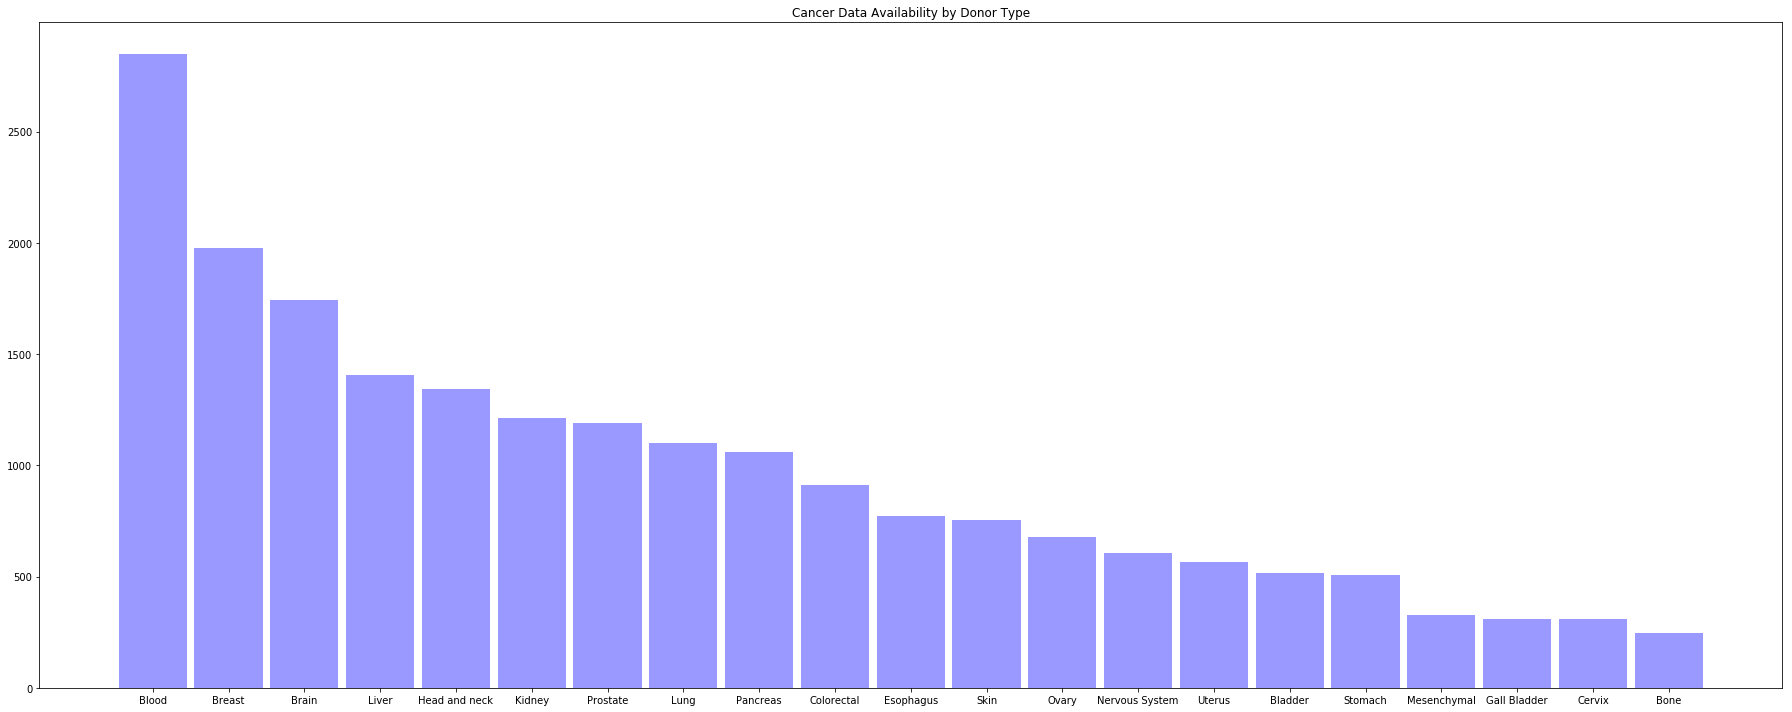

In [13]:
n=len(data)
fig, ax = plt.subplots(figsize=(25,10))
index = np.arange(n)

bar_width = 0.9
opacity = 0.4
ax.set_title('Cancer Data Availability by Donor Type')
ax.set_xticks(index)
ax.set_xticklabels(labels)

rects1 = ax.bar(index, numbers, bar_width,alpha=opacity, color='b')
fig.tight_layout()
plt.show()